CPME 255 Project

The objective of the course project is to apply all the skills and techniques learned during the
course to a real-world dataset. In this project, you will:
1. Find a real-world dataset of your choice online
2. Parse, clean and analyze data
3. Create visualization
4. Ask and answer interesting research questions about the data
5. Prepare a final report about the findings.
Evaluation criteria:
• You must ask and answer at least 5 questions about the dataset
• EDA must include some statistics and visualization
• Must include explanations apart from code
• Must not be plagiarized i.e., copy-pasted for somewhere else. Can take some part of
code and try to modify and create your own.
Target Audience
Be sure to target your report at people who may not know your area/domain well. Remember
that you want to convey that you have done a lot of analytical work and that rigor should be
conveyed, but not necessarily the calculations. It is important to start off so that the reader is
interested. What aspect of this analysis interested you? You could have chosen anything, but
you chose this particular topic. Why?
Breadth of Analysis
From a grade/score point of view, it is important to touch upon as many different aspects as
you can. These include the premise, asking the right questions, data manipulation, analysis,
visualization, and conclusion.
Length of your report
Typically, your report will be about 5-7 pages long. You can always include an appendix if you
have some supplementary material that you wish to include.
Note that several components have come together to make a good final project. It starts with
obtaining data (it always starts with this!), cleaning the data (Data Quality), manipulating the
data (shaping) to suit your analysis. Then you must decide on different analysis options, apply
those techniques. Make sure you are creating different graphs but present only the ones that
are informative. Make sure that your conclusions can be supported by your analysis, and that
the questions that you raised are answered appropriately.
Deliverables
You must submit the following:
1. The Final Report (text with graphs)
2. Your code
3. Data set or link



In [4]:
#Importing Libraries      
import pandas as pd
import numpy as np
import scipy.io
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

c:\Users\zipei\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
'''
Step 1: Selecting and Loading a real-world dataset. (global-cybersecurity-threats-2015-2024)
'''
# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-cybersecurity-threats-2015-2024")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\zipei\.cache\kagglehub\datasets\atharvasoundankar\global-cybersecurity-threats-2015-2024\versions\1


In [6]:
'''
Step 2: Perform data preparation and cleaning
• Load the dataset into Jupyter notebook
• Explore the basic information about the data, e.g., size of data ranges, some basic
statistics etc.
• Handle missing, incorrect and invalid data
• Perform any additional steps (parsing dates, feature engineering, create additional
columns etc.)

We can borrow homework 2's code here
'''
df=pd.read_csv(path+'/Global_Cybersecurity_Threats_2015-2024.csv')
print(df.head()) # Print first 5 rows


   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

In [73]:
# Print description complete
print(df.describe)

<bound method NDFrame.describe of       Country  Year        Attack Type     Target Industry  \
0       China  2019           Phishing           Education   
1       China  2019         Ransomware              Retail   
2       India  2017  Man-in-the-Middle                  IT   
3          UK  2024         Ransomware  Telecommunications   
4     Germany  2018  Man-in-the-Middle                  IT   
...       ...   ...                ...                 ...   
2995       UK  2021         Ransomware          Government   
2996   Brazil  2023      SQL Injection  Telecommunications   
2997   Brazil  2017      SQL Injection                  IT   
2998       UK  2022      SQL Injection                  IT   
2999  Germany  2021      SQL Injection              Retail   

      Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                             80.53                    773169  Hacker Group   
1                             62.19                    295961  

In [74]:
# Print column types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None


In [75]:
# Print rows x columns
print(df.shape)

(3000, 10)


In [76]:
# Checks for missing or null values
print(df.isnull().sum())

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [77]:
# Check data types
print(df.dtypes)

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


In [78]:
# Check for duplicated rows
df.duplicated().sum()

# Shows DataFrame of duplicates
df[df.duplicated()]

# Remove duplicates anyway?
df = df.drop_duplicates()

In [79]:
# Standardize Column Names?

In [80]:
# Label Encoder - Encode Categorical Variables?

# StandardScaler
scaler = StandardScaler()

In [81]:
'''
Step 3: Perform exploratory analysis and visualization
• Compute statistics for numeric columns
• Explore distribution of numeric columns using histograms etc.
• Explore relationship between various columns
• Make a note of interesting insights from the exploratory analysis
'''
# Display info about columns including non-null counts and data types
print("\nColumn Info:")
print(df.info())

# For a more detailed view of non-null counts and data types
print("\nDetailed Column Analysis:")
for column in df.columns:
    non_null_count = df[column].count()
    dtype = df[column].dtype
    print(f"Column: {column}")
    print(f"Non-null count: {non_null_count}")
    print(f"Data type: {dtype}")
    print("-" * 50)




Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None

Detailed Column A

In [82]:
# Analyze statistics based on data type
for column in df.columns:
    print(f"\nAnalyzing {column}:")
    if df[column].dtype == 'object':  # For categorical/string columns like country
        value_counts = df[column].value_counts()
        print(f"Most frequent value: {value_counts.index[0]} (occurs {value_counts.iloc[0]} times)")
        print(f"Least frequent value: {value_counts.index[-1]} (occurs {value_counts.iloc[-1]} times)")
    elif np.issubdtype(df[column].dtype, np.number):  # For numeric columns
        print(f"Maximum value: {df[column].max()}")
        print(f"Minimum value: {df[column].min()}")
        print(f"Average value: {df[column].mean():.2f}")


Analyzing Country:
Most frequent value: UK (occurs 321 times)
Least frequent value: China (occurs 281 times)

Analyzing Year:
Maximum value: 2024
Minimum value: 2015
Average value: 2019.57

Analyzing Attack Type:
Most frequent value: DDoS (occurs 531 times)
Least frequent value: Man-in-the-Middle (occurs 459 times)

Analyzing Target Industry:
Most frequent value: IT (occurs 478 times)
Least frequent value: Telecommunications (occurs 403 times)

Analyzing Financial Loss (in Million $):
Maximum value: 99.99
Minimum value: 0.5
Average value: 50.49

Analyzing Number of Affected Users:
Maximum value: 999635
Minimum value: 424
Average value: 504684.14

Analyzing Attack Source:
Most frequent value: Nation-state (occurs 794 times)
Least frequent value: Hacker Group (occurs 686 times)

Analyzing Security Vulnerability Type:
Most frequent value: Zero-day (occurs 785 times)
Least frequent value: Weak Passwords (occurs 730 times)

Analyzing Defense Mechanism Used:
Most frequent value: Antivirus (

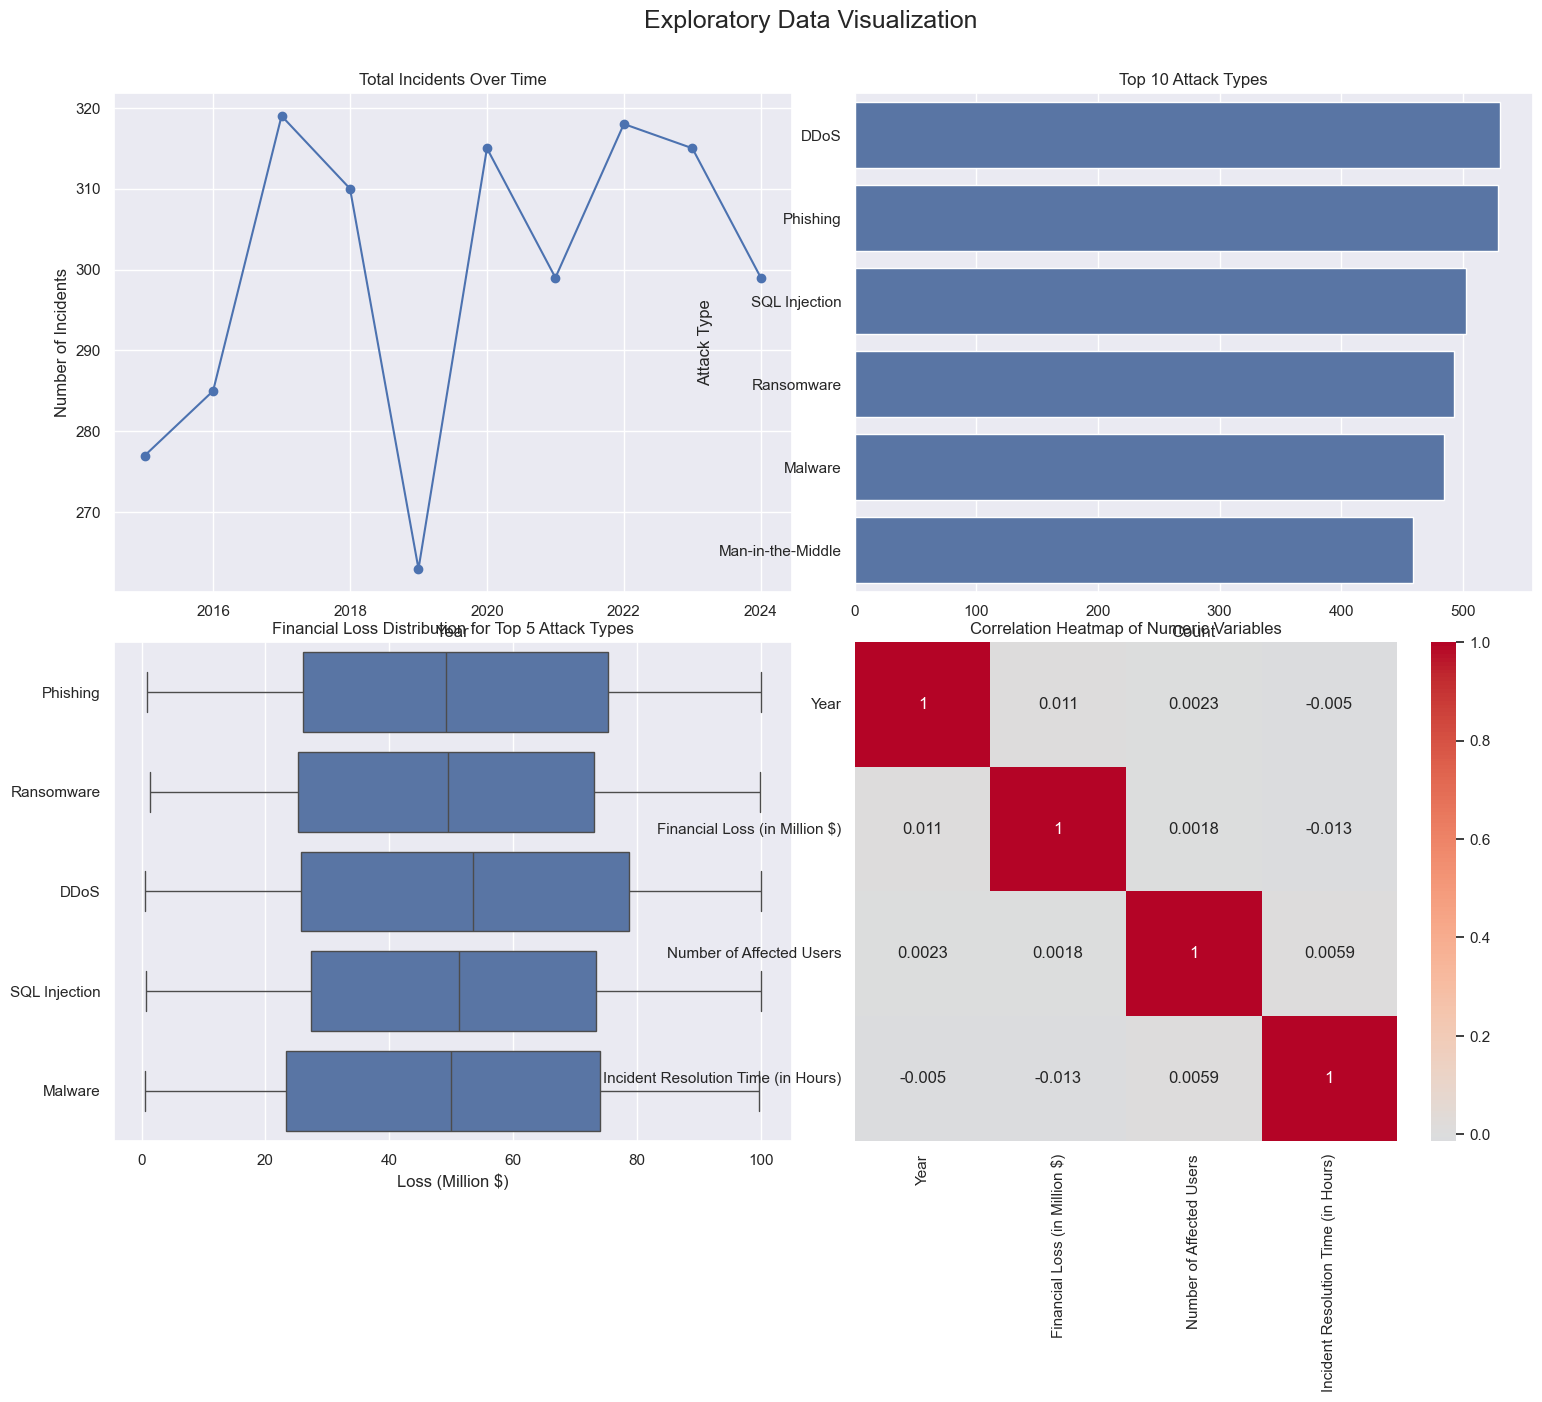

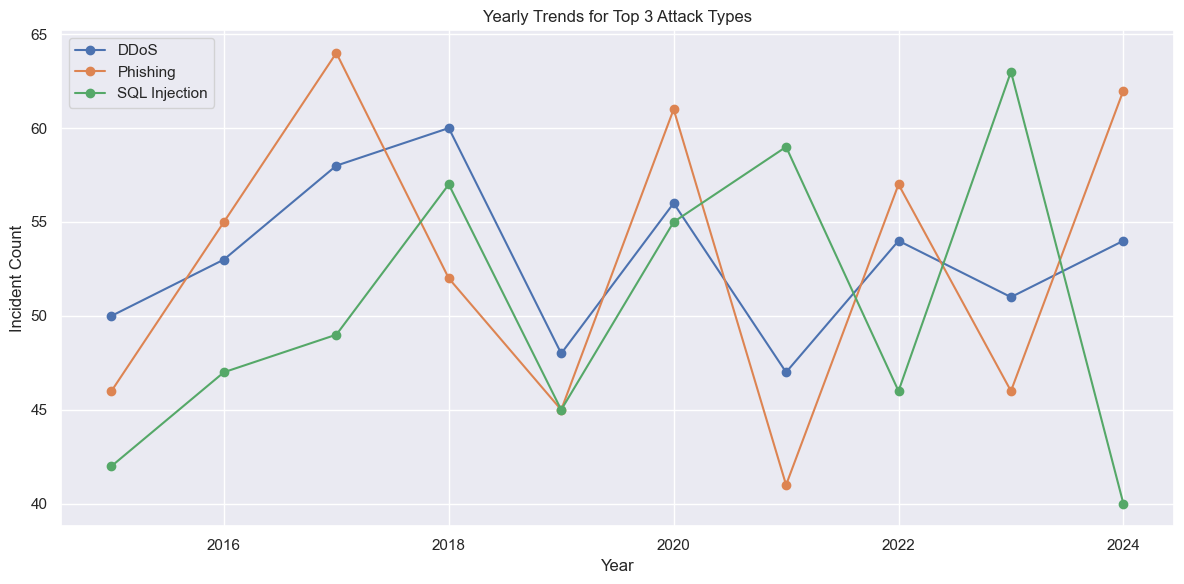

In [16]:
# 1) Apply Seaborn theme
sns.set_theme()

# 2) Compute total incidents per year
incidents_per_year = (
    df
    .groupby('Year')
    .size()
    .reset_index(name='Incident_Count')
)

# 3) Set up a 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.tight_layout(rect=[0, 0, 1, 0.93])
fig.suptitle('Exploratory Data Visualization', fontsize=18)

# — Plot 1: Total incidents over time —
axes[0,0].plot(
    incidents_per_year['Year'],
    incidents_per_year['Incident_Count'],
    marker='o'
)
axes[0,0].set_title('Total Incidents Over Time')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Incidents')

# — Plot 2: Top 10 attack types (overall) —
top_attacks = (
    df['Attack Type']
    .value_counts()
    .nlargest(10)
)
sns.barplot(
    x=top_attacks.values,
    y=top_attacks.index,
    ax=axes[0,1]
)
axes[0,1].set_title('Top 10 Attack Types')
axes[0,1].set_xlabel('Count')
axes[0,1].set_ylabel('Attack Type')

# — Plot 3: Distribution of Financial Loss by Attack Type —
#    (showing only top 5 types for readability)
top5 = top_attacks.index[:5]
sns.boxplot(
    y='Attack Type',
    x='Financial Loss (in Million $)',
    data=df[df['Attack Type'].isin(top5)],
    ax=axes[1,0]
)
axes[1,0].set_title('Financial Loss Distribution for Top 5 Attack Types')
axes[1,0].set_xlabel('Loss (Million $)')
axes[1,0].set_ylabel('')

# — Plot 4: Correlation Heatmap —
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    ax=axes[1,1]
)
axes[1,1].set_title('Correlation Heatmap of Numeric Variables')

# — Additional detail: Trends of top 3 attack types over time —
plt.figure(figsize=(12,6))
for atk in top_attacks.index[:3]:
    yearly = (
        df[df['Attack Type']==atk]
        .groupby('Year')
        .size()
        .rename(atk)
    )
    plt.plot(yearly.index, yearly.values, marker='o', label=atk)

plt.title('Yearly Trends for Top 3 Attack Types')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.legend()
plt.tight_layout()
plt.show()

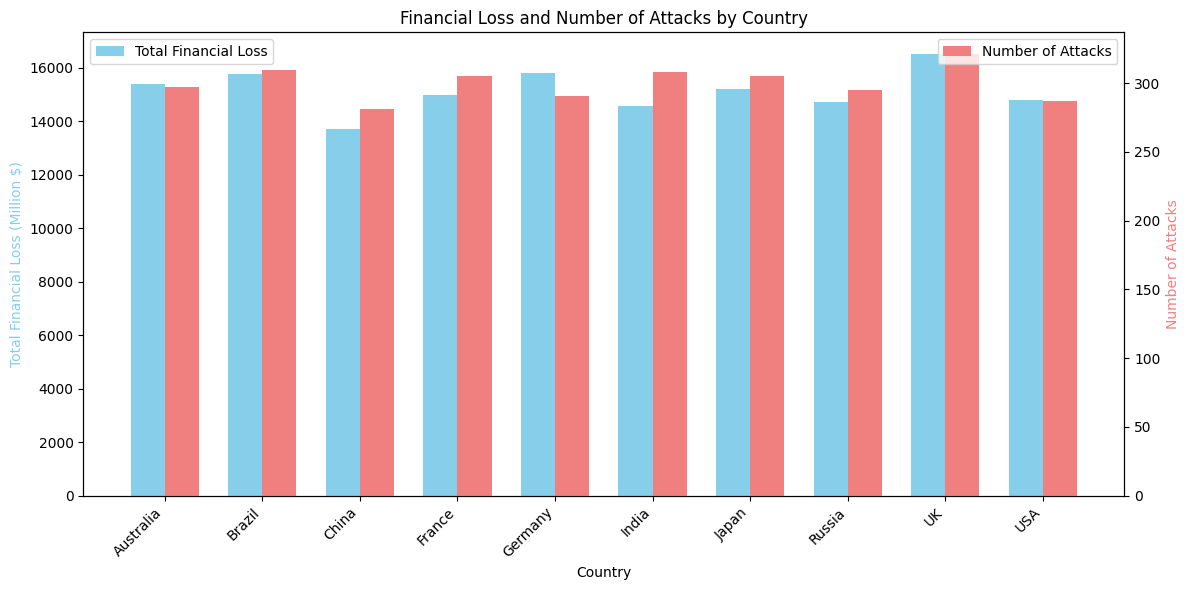

In [7]:
# Analyze attacks and losses by country
country_stats = df.groupby('Country').agg({
    'Financial Loss (in Million $)': 'sum',
    'Attack Type': 'count'
}).reset_index()

country_stats.columns = ['Country', 'Total Financial Loss', 'Number of Attacks']

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

# Plot bars
x = np.arange(len(country_stats))
bar_width = 0.35

bars1 = ax1.bar(x - bar_width/2, country_stats['Total Financial Loss'], 
                bar_width, label='Total Financial Loss', color='skyblue')
bars2 = ax2.bar(x + bar_width/2, country_stats['Number of Attacks'],
                bar_width, label='Number of Attacks', color='lightcoral')

# Customize axes
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Financial Loss (Million $)', color='skyblue')
ax2.set_ylabel('Number of Attacks', color='lightcoral')

ax1.set_xticks(x)
ax1.set_xticklabels(country_stats['Country'], rotation=45, ha='right')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Financial Loss and Number of Attacks by Country')
plt.tight_layout()
plt.show()


In [84]:
'''
Step 4: Ask and answer questions about the data
• Ask at least 5 questions about your dataset
• Answer the questions either by computing the results or by plotting graphs
• Create new columns, merge multiple datasets, and perform grouping/aggregation
whenever necessary
'''


'\nStep 4: Ask and answer questions about the data\n• Ask at least 5 questions about your dataset\n• Answer the questions either by computing the results or by plotting graphs\n• Create new columns, merge multiple datasets, and perform grouping/aggregation\nwhenever necessary\n'

In [85]:
# Q1 Which attack types tend to cause the highest financial loss?

# Categorize financial loss based on Low Medium High Threshold
def categorize_financial_loss(amount):
    if amount < 40:
        return 'Low'
    elif amount <= 70:
        return 'Medium'
    else:
        return 'High'

df['Financial Loss Category'] = df['Financial Loss (in Million $)'].apply(categorize_financial_loss)

all_attack_types = df['Attack Type'].unique()
high_loss_counts = df[df['Financial Loss Category'] == 'High'].groupby('Attack Type').size().reindex(all_attack_types, fill_value=0)
total_loss = df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().reindex(all_attack_types, fill_value=0)

avg_loss_per_high = total_loss / high_loss_counts.replace(0, pd.NA)  # Avoid divide-by-zero warnings


financial_loss_summary = pd.DataFrame({
    'High Loss Count': high_loss_counts,
    'Total Financial Loss (in Million $)': total_loss,
    'Avg Loss per High-Loss Incident': avg_loss_per_high
}).sort_values('Total Financial Loss (in Million $)', ascending=False)

print(financial_loss_summary)

                   High Loss Count  Total Financial Loss (in Million $)  \
Attack Type                                                               
DDoS                           180                             27630.92   
Phishing                       172                             26693.29   
SQL Injection                  136                             25156.56   
Ransomware                     144                             24479.32   
Malware                        153                             23967.95   
Man-in-the-Middle              144                             23550.87   

                   Avg Loss per High-Loss Incident  
Attack Type                                         
DDoS                                    153.505111  
Phishing                                155.193547  
SQL Injection                           184.974706  
Ransomware                              169.995278  
Malware                                 156.653268  
Man-in-the-Middle           

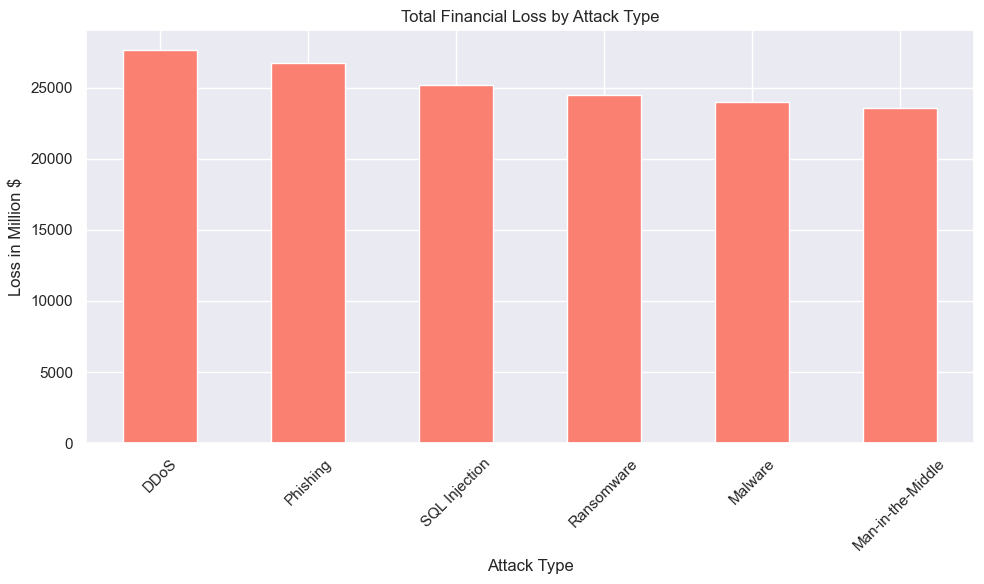

In [86]:
# Total financial loss

financial_loss_summary['Total Financial Loss (in Million $)'].plot(kind='bar', figsize=(10,6), color='salmon')
plt.title('Total Financial Loss by Attack Type')
plt.ylabel('Loss in Million $')
plt.xlabel('Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


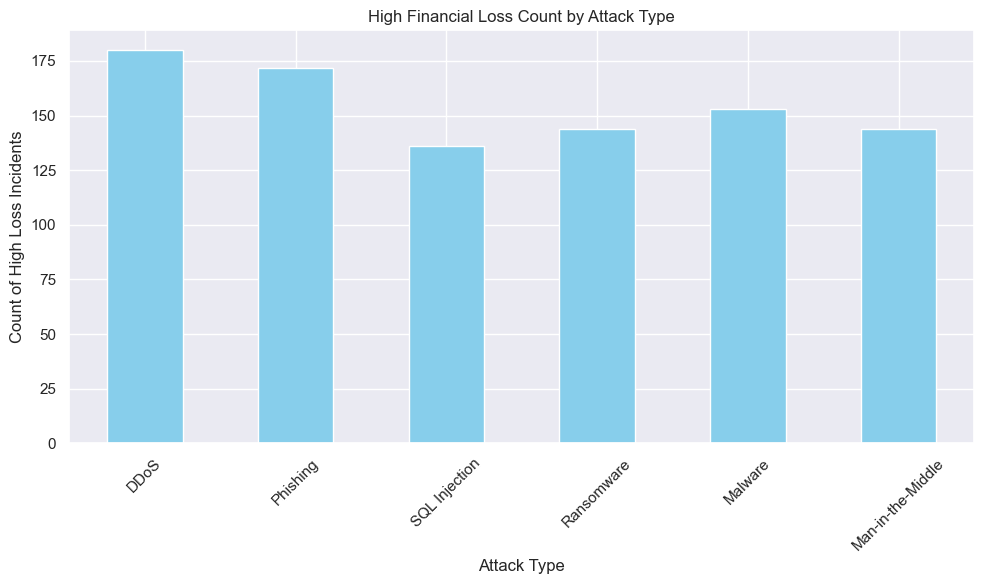

In [87]:
financial_loss_summary['High Loss Count'].plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('High Financial Loss Count by Attack Type')
plt.ylabel('Count of High Loss Incidents')
plt.xlabel('Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To attack the question "Which attack types tend to cause the highest financial loss?" I categorized financial loss based on a Low (<40 Million), Medium (40-70 Million), and High Threshold (>70 Million).

DDoS was has caused the most financial loss and high loss incidents. Phishing follows in terms of both frequency and financial loss severity. SQL Injection is amongst the top 3 for the highest financial loss, but it has the lowest count of high loss incidents of 136. The average loss per incident for SQL Injection is 184.974706, which is the highest amongst the highest finical loss attack types.

In [88]:
# Q2 Defense Effectiveness based on resolution time

avg_resolution_by_defense = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values()
print(avg_resolution_by_defense)

Defense Mechanism Used
Firewall              35.714530
Antivirus             36.573248
Encryption            36.589527
AI-based Detection    36.612350
VPN                   36.864379
Name: Incident Resolution Time (in Hours), dtype: float64


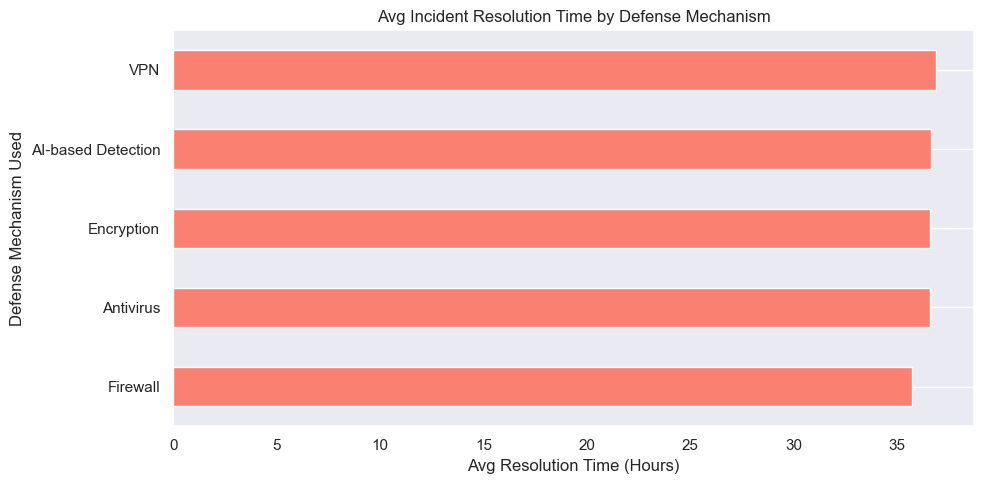

In [89]:
# Plot average resolution time
plt.figure(figsize=(10, 5))
avg_resolution_by_defense.plot(kind='barh', color='salmon')
plt.xlabel('Avg Resolution Time (Hours)')
plt.title('Avg Incident Resolution Time by Defense Mechanism')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [90]:
avg_loss_by_defense = df.groupby('Defense Mechanism Used')['Financial Loss (in Million $)'].mean().sort_values()
print(avg_loss_by_defense)

Defense Mechanism Used
Firewall              49.719709
VPN                   50.209673
AI-based Detection    50.361527
Encryption            50.400203
Antivirus             51.698838
Name: Financial Loss (in Million $), dtype: float64


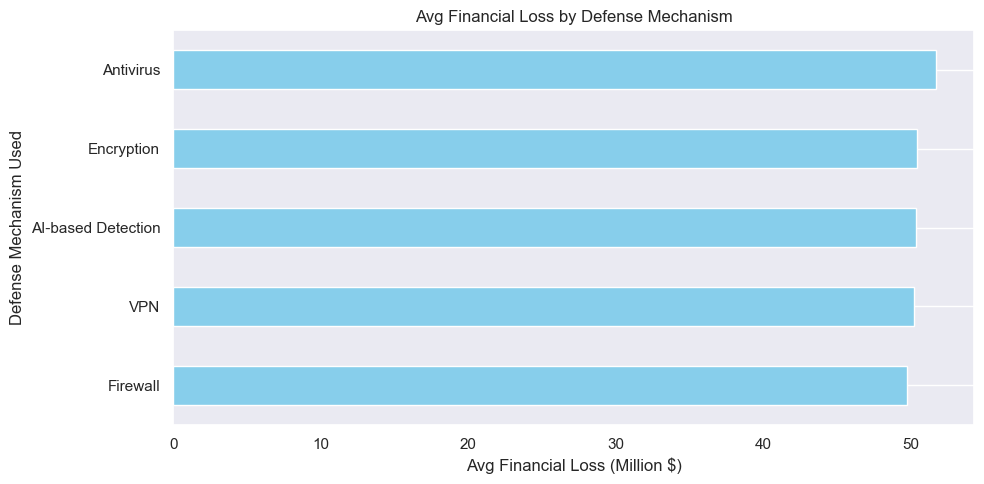

In [91]:
# Plot average financial loss
plt.figure(figsize=(10, 5))
avg_loss_by_defense.plot(kind='barh', color='skyblue')
plt.xlabel('Avg Financial Loss (Million $)')
plt.title('Avg Financial Loss by Defense Mechanism')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [92]:
defense_resolution_summary = pd.DataFrame({
    'Avg Resolution Time (Hours)': df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean(),
    'Avg Financial Loss (Million $)': df.groupby('Defense Mechanism Used')['Financial Loss (in Million $)'].mean()
}).sort_values('Avg Resolution Time (Hours)')

print(defense_resolution_summary)

                        Avg Resolution Time (Hours)  \
Defense Mechanism Used                                
Firewall                                  35.714530   
Antivirus                                 36.573248   
Encryption                                36.589527   
AI-based Detection                        36.612350   
VPN                                       36.864379   

                        Avg Financial Loss (Million $)  
Defense Mechanism Used                                  
Firewall                                     49.719709  
Antivirus                                    51.698838  
Encryption                                   50.400203  
AI-based Detection                           50.361527  
VPN                                          50.209673  


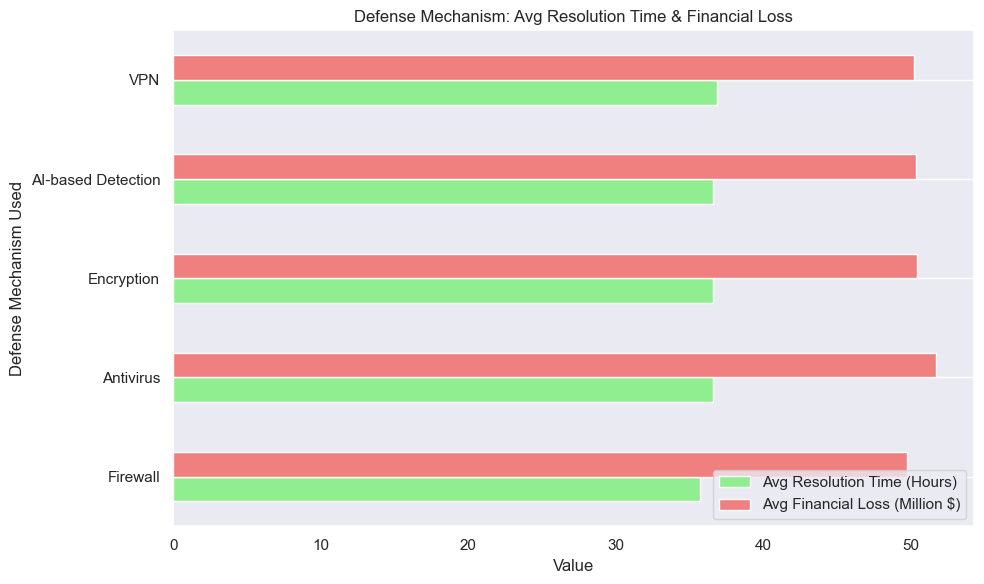

In [93]:
defense_resolution_summary.plot(kind='barh', figsize=(10, 6), color=['lightgreen', 'lightcoral'])
plt.title('Defense Mechanism: Avg Resolution Time & Financial Loss')
plt.xlabel('Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

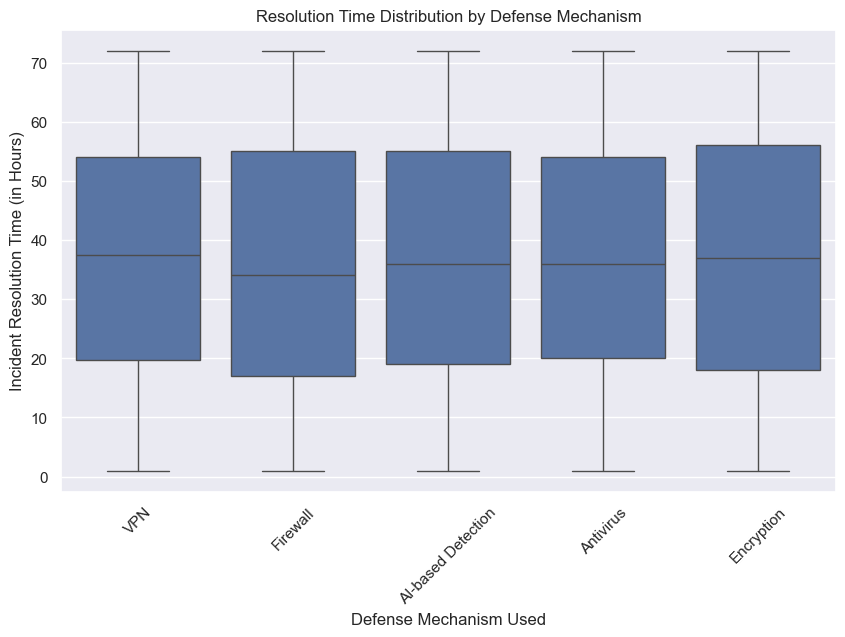

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', data=df)
plt.title('Resolution Time Distribution by Defense Mechanism')
plt.xticks(rotation=45)
plt.show()

From the summary of the defense mechanism, resolution time in hours, and financial loss, we can see that Firewall has the fastest incident resolution time and lowest average financial loss. This could imply that firewall might be the most effective defense mechanism for limiting financial loss damage and resolving issues quickly. Antivirus has the highest financial loss and is slower in terms of resolution time. The effectives is less when comparing it to Firewall. However, most of the defense mechanism have similar resolution times and financial losses. None of the defense mechanism did not outperform one another drastically and this area could be investigated further. 

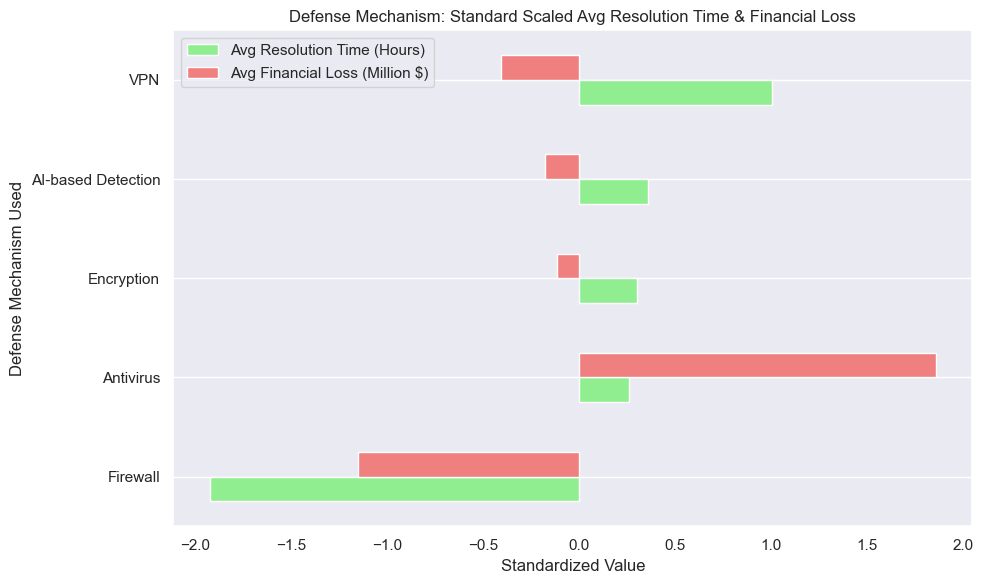

In [101]:
df_scaled = pd.DataFrame(
    scaler.fit_transform(defense_resolution_summary),
    columns=defense_resolution_summary.columns,
    index=defense_resolution_summary.index
)

# Plot the scaled data
df_scaled.plot(kind='barh', figsize=(10, 6), color=['lightgreen', 'lightcoral'])
plt.title('Defense Mechanism: Standard Scaled Avg Resolution Time & Financial Loss')
plt.xlabel('Standardized Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Firewall is seen to be the most effective defense next to Encryption by using the standardized scaled data, in terms of fastest resolution and lowest loss. Antivirus can be seen to have the highest financial loss. VPN has the slowest resolution time. AI-based Detection is quite average. 

In [ ]:
# Q3 What is the most common defense mechanism used?

# Count of defense mechanism usage
defense_counts = df['Defense Mechanism Used'].value_counts()

most_common_defense = defense_counts.idxmax()
most_common_count = defense_counts.max()

print(f"The most common defense mechanism used is '{most_common_defense}' with {most_common_count} incidents.")

The most common defense mechanism used is 'Antivirus' with 628 incidents.


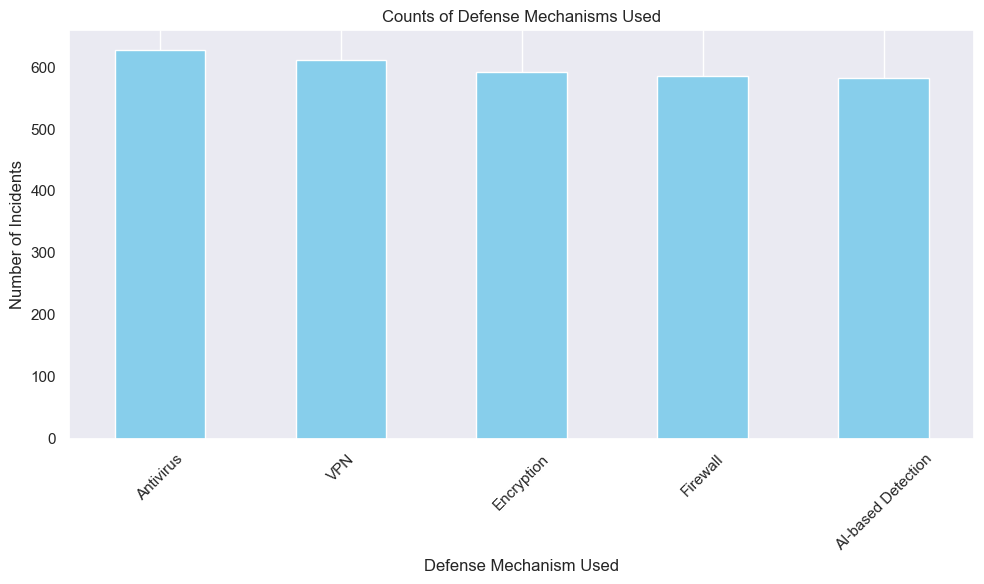

In [105]:
defense_counts.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Counts of Defense Mechanisms Used')
plt.xlabel('Defense Mechanism Used')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

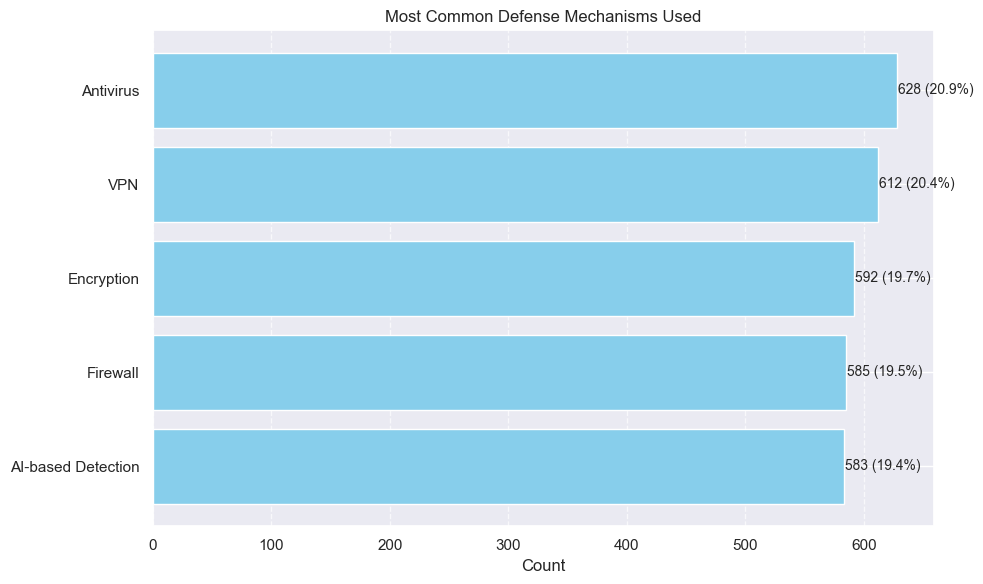

In [ ]:
# Calculate percentage
percentages = 100 * defense_counts / defense_counts.sum()

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.barh(defense_counts.index, defense_counts.values, color='skyblue')

# Added value and percentage labels on each bar
for bar, count, pct in zip(bars, defense_counts.values, percentages):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{count} ({pct:.1f}%)',
            va='center', fontsize=10)

ax.set_xlabel('Count')
ax.set_title('Most Common Defense Mechanisms Used')
ax.invert_yaxis()  # highest at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The most common defense mechanism used is 'Antivirus' with 628 incidents. In terms of percentage, Antivirus has a slightly higher percentage than VPN at 20.9% compared to 20.4% with 612 incidents.

In [107]:
# Q4 Are the attacks from more insider threats or external?

# Count the occurrences of each attack source
attack_source_counts = df['Attack Source'].value_counts()

# Calculate percentages
attack_source_percent = 100 * attack_source_counts / attack_source_counts.sum()

# Display counts and percentages
attack_source_summary = pd.DataFrame({
    'Count': attack_source_counts,
    'Percentage': attack_source_percent.round(2)
})

print(attack_source_summary)

               Count  Percentage
Attack Source                   
Nation-state     794       26.47
Unknown          768       25.60
Insider          752       25.07
Hacker Group     686       22.87


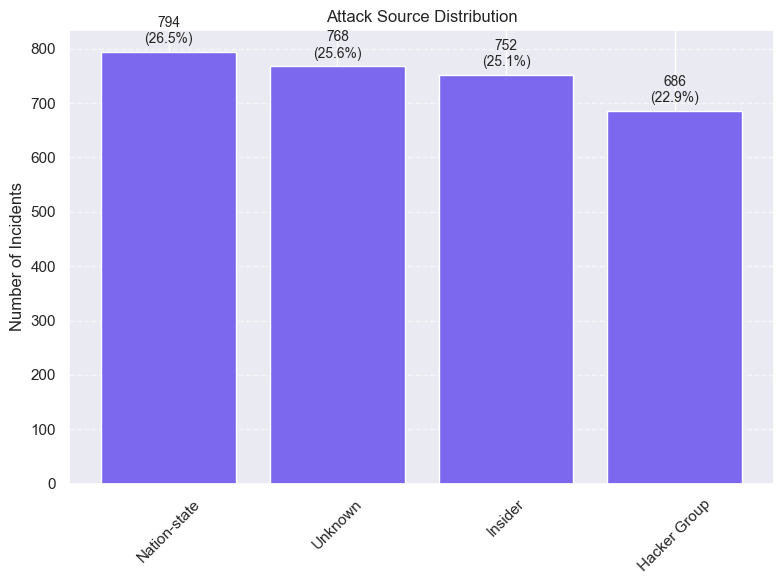

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(attack_source_summary.index, attack_source_summary['Count'], color='mediumslateblue')

# Add value and percentage labels
for bar, count, pct in zip(bars, attack_source_summary['Count'], attack_source_summary['Percentage']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
            f'{count}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10)

ax.set_title('Attack Source Distribution')
ax.set_ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

For better visualization we can further group internal threats and external threats. Internal threats are those threats that are clearly internal or caused by employees, contractors, etc. External actors are nation-state, and hacker group. Unknown can be labed as external under the assumption that it is default by many security analyses. It is normally classifed as external unitl it is proven otherwise. Using this knowledge, it can be a seperate and in its own group and labeled as undertermined or follow the common method. 

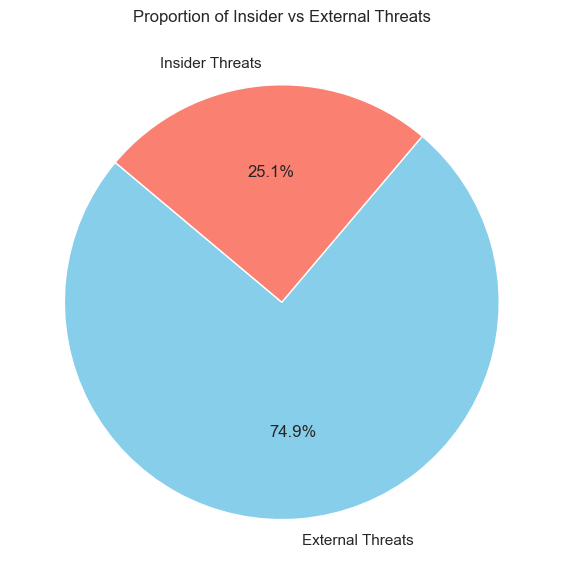

In [ ]:
# Group into external vs insider
external_count = df['Attack Source'].isin(['Nation-state', 'Hacker Group', 'Unknown']).sum() #Unknown is classified as external until otherwise proven insider
insider_count = df['Attack Source'].isin(['Insider']).sum()

labels = ['External Threats', 'Insider Threats']
sizes = [external_count, insider_count]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Insider vs External Threats')
plt.tight_layout()
plt.show()

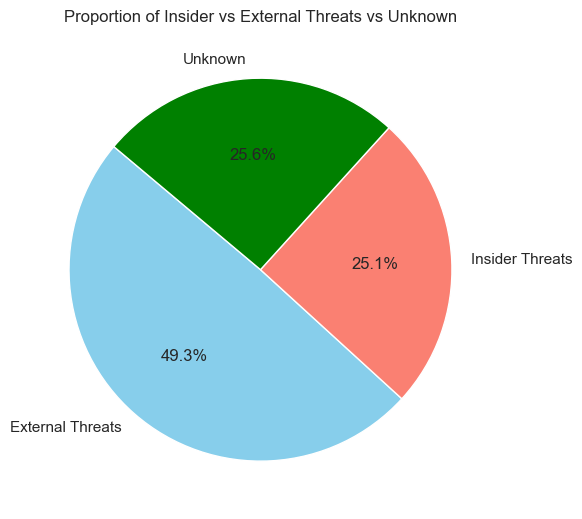

In [113]:
# Group into external vs insider vs unknown
external_count = df['Attack Source'].isin(['Nation-state', 'Hacker Group']).sum() #Unknown is classified as external until otherwise proven insider
insider_count = df['Attack Source'].isin(['Insider']).sum()
unknown_count = df['Attack Source'].isin(['Unknown']).sum() 

labels = ['External Threats', 'Insider Threats', 'Unknown']
sizes = [external_count, insider_count,unknown_count]
colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Insider vs External Threats vs Unknown')
plt.tight_layout()
plt.show()

External threats is the most common compared to insider threats. It accounts for almost 3/4 of all of the attacks. When leaving unknown as its own category, external threats is still leading with unknown and insider threats following.

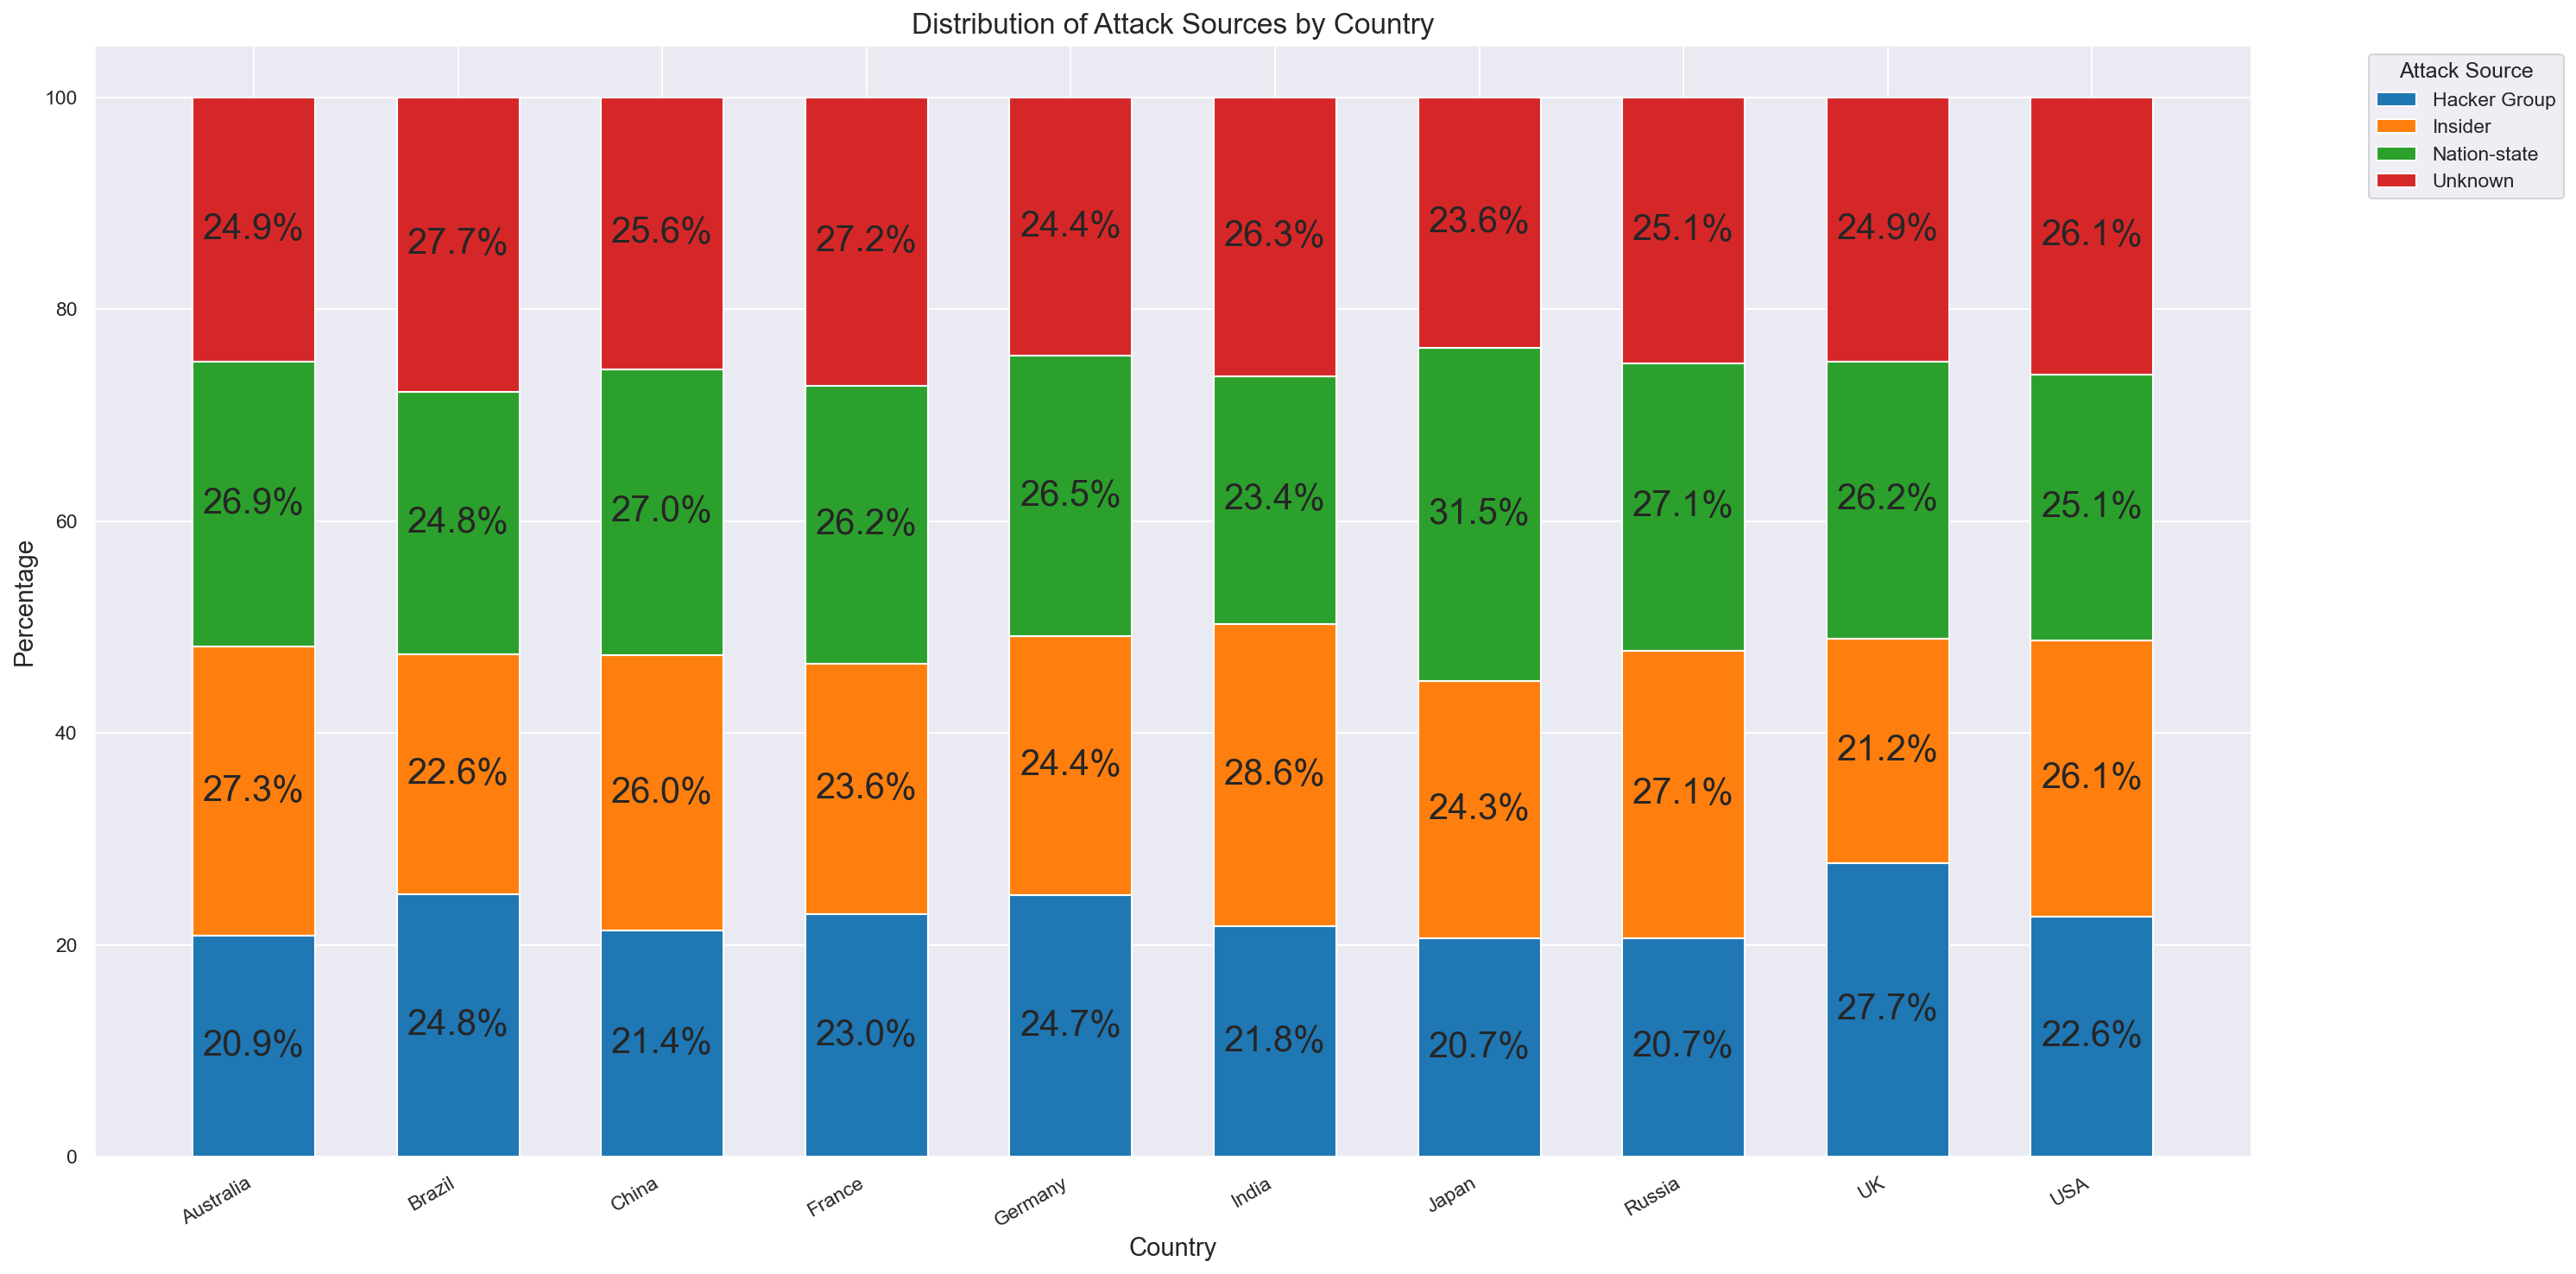

In [44]:
# Q5 Incident impact?
attack_source_by_country = pd.crosstab(df['Country'], df['Attack Source'], normalize='index') * 100

plt.figure(figsize=(20,10))
bar_width = 0.6
x = np.arange(len(attack_source_by_country.index))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bottoms = np.zeros(len(attack_source_by_country.index))

for idx, category in enumerate(attack_source_by_country.columns):
    heights = attack_source_by_country[category].values
    bars = plt.bar(x, heights, bar_width, bottom=bottoms, label=category, color=colors[idx])
    
    # Add labels (percentages) to each segment
    for bar, height, bottom in zip(bars, heights, bottoms):
        if height > 0:  # Avoid labeling zero-height bars
            plt.text(
                bar.get_x() + bar.get_width()/2,
                bottom + height/2,
                f"{height:.1f}%",
                ha='center', va='center', fontsize=20
            )
    
    bottoms += heights  # Update bottoms for next stack

plt.xticks(x, attack_source_by_country.index, rotation=30, ha='right')
plt.title('Distribution of Attack Sources by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Attack Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


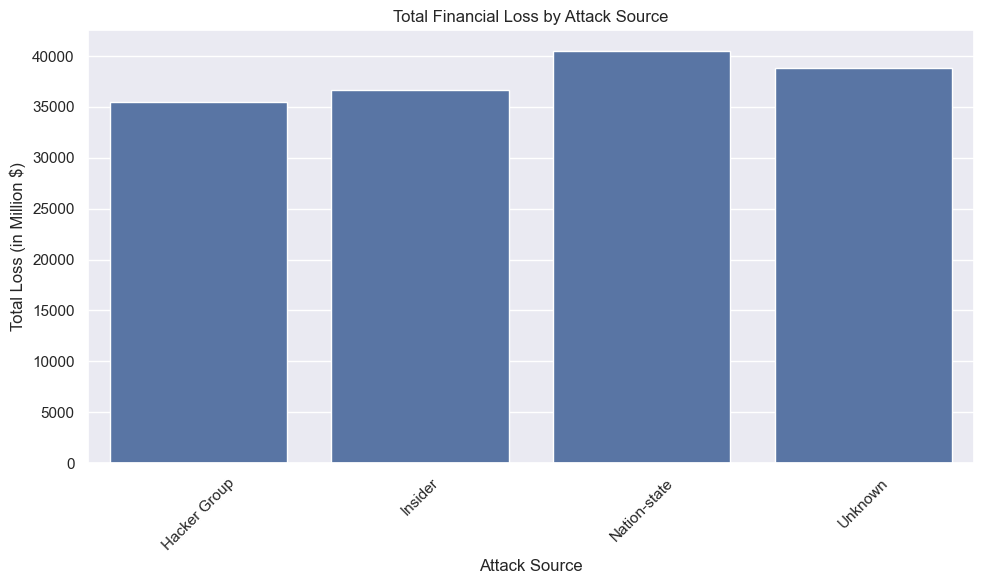

In [25]:
# Plot attack source vs financial loss
plt.figure(figsize=(10, 6))
total_loss_by_source = df.groupby('Attack Source')['Financial Loss (in Million $)'].sum()
sns.barplot(x=total_loss_by_source.index, y=total_loss_by_source.values)
plt.title('Total Financial Loss by Attack Source')
plt.xlabel('Attack Source')
plt.ylabel('Total Loss (in Million $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 5: Summarize your inferences and write a conclusion

Attack Types and Financial Loss
- Most common attack types are DDoS, phising, and malware
- DDoS lead to highest financial loss.
- Man-in-the-middle is least popular and effective.

Defense Mechanism Effectiveness
- Firewall is best performing defense mechanism due to high resolution time and low financial loss.
- Newer technology such as AI so far doesn't do the job.
- Antivirus's performancing is trailing, suggesting it's not able to defend most attacks. 

Attack Source Analysis
- Only 25% of all attacks come from insider.
- At least a quater of all attacks were performing by hacker groups.
- India is the country with highests attack source percentage coming from within the country.

Future Work Ideas:
- Acquire data for more diversed geographical groups.
- More detailed break down on attack types/defense mechanisms. (e.g: different brand of antivirus tools, names of malware)

